# Perkenalan

==========================================================

Nama  : Muhammad Insani

Batch : HCK-010

Program ini dibuat untuk memprediksi transaksi penipuan dari dataset [fraud-transaction-detection.csv](https://www.kaggle.com/datasets/sanskar457/fraud-transaction-detection) yang terdiri dari 1,75 juta transaksi dengan menggunakan model terbaik diantara SVM, KNN, DecisionTree, Random Forest, dan Boosting

===========================================================

## Deskripsi dataset

Dataset ini terdiri dari 1,75 juta transaksi yang dilakukan dengan mempertimbangkan pengguna simulasi melalui berbagai terminal selama periode Januari 2023 hingga Juni 2023. Namun, data tersebut sangat tidak seimbang, dengan hanya sebagian kecil (13,45%) transaksi yang diklasifikasikan sebagai penipuan, berikut link datasetnya : [fraud-transaction-detection.csv](https://www.kaggle.com/datasets/sanskar457/fraud-transaction-detection).

| Kolom               | Deskripsi                                            |
|----------------------|--------------------------------------------------------|
| Unnamed: 0           | Indeks unik untuk setiap baris dalam dataset          |
| TRANSACTION_ID       | Pengidentifikasi unik untuk setiap transaksi           |
| TX_DATETIME          | Tanggal dan waktu transaksi                             |
| CUSTOMER_ID          | Pengidentifikasi unik untuk pelanggan yang melakukan transaksi |
| TERMINAL_ID          | Pengidentifikasi untuk terminal ATM atau POS tempat transaksi dilakukan |
| TX_AMOUNT            | Jumlah transaksi                                       |
| TX_TIME_SECONDS      | Waktu transaksi dalam detik sejak tengah malam         |
| TX_TIME_DAYS         | Waktu transaksi dalam hari sejak transaksi pertama dalam dataset |
| TX_FRAUD            | Label biner yang menunjukkan apakah transaksi tersebut merupakan transaksi fraud (1) atau bukan fraud (0) |
| TX_FRAUD_SCENARIO   | Label kategoris yang menunjukkan jenis transaksi fraud (misalnya, "pembelian dengan kartu curian" atau "pengambilalihan akun") |


## Latar Belakang

Di tengah revolusi digital dan pertumbuhan eksponensial transaksi keuangan global, perlindungan terhadap keamanan sistem pembayaran menjadi krusial. Dataset transaksi finansial global yang mencakup 1,75 juta kasus dari Januari hingga Juni 2023 memberikan peluang unik untuk mengeksplorasi dinamika penipuan di tingkat global. Namun, ketidakseimbangan distribusi data, dengan hanya 13,45% transaksi yang diidentifikasi sebagai penipuan, menciptakan tantangan nyata dalam pengembangan model prediktif yang dapat mengantisipasi dan menanggulangi pola penipuan yang semakin berkembang. Dalam konteks global ini, penelitian ini bukan hanya sekadar respons terhadap tren kecurangan terkini, tetapi juga sebuah langkah signifikan menuju penguatan keamanan dalam ekosistem transaksi keuangan yang semakin kompleks.

## Problem Statement

Dalam menghadapi ketidakseimbangan data transaksi keuangan, tantangan utamanya adalah memperbaiki model prediktif agar lebih cerdas dalam mengidentifikasi fraud transaction dengan label "TX_FRAUD". Fokusnya adalah mengurangi prediksi yang salah terhadap fraud, mengintegrasikan metrik evaluasi yang lebih cerdas daripada akurasi umum. Proyek ini bertujuan memberikan solusi cerdas dan efisien untuk meningkatkan keamanan sistem pembayaran dengan prediksi yang optimal terkait transaksi fraud.

# Import Libraries

In [86]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import joblib
import warnings
warnings.filterwarnings('ignore') #Untuk mengabaikan fitur peringatan

# Data Loading

In [87]:
df = pd.read_csv('Final Transactions.csv')
df.head()

,Unnamed: 0,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   TRANSACTION_ID     int64  
 2   TX_DATETIME        object 
 3   CUSTOMER_ID        int64  
 4   TERMINAL_ID        int64  
 5   TX_AMOUNT          float64
 6   TX_TIME_SECONDS    int64  
 7   TX_TIME_DAYS       int64  
 8   TX_FRAUD           int64  
 9   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 133.8+ MB


In [89]:
df = df.drop_duplicates()
df.value_counts().sum()

1754155

Tidak terdapat data duplicates karena jumlah value masih sama dengan sebelumnya

In [90]:
df.isnull().sum()

Unnamed: 0           0
TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

In [91]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Unnamed: 0         int64         
 1   TRANSACTION_ID     int64         
 2   TX_DATETIME        datetime64[ns]
 3   CUSTOMER_ID        int64         
 4   TERMINAL_ID        int64         
 5   TX_AMOUNT          float64       
 6   TX_TIME_SECONDS    int64         
 7   TX_TIME_DAYS       int64         
 8   TX_FRAUD           int64         
 9   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 133.8 MB


Menyesuaikan type data TX_DATETIME menjadi datetime64

In [92]:
df = df.drop(['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        int64         
 3   TERMINAL_ID        int64         
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    int64         
 6   TX_TIME_DAYS       int64         
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 120.4 MB


saya menghapus kolom "Unnamed: 0" karena kolom ini hanya berfungsi sebagai indeks tanpa memberikan informasi tambahan yang berguna, dan pengidentifikasi unik "TRANSACTION_ID" sudah cukup. Menghapusnya dapat menyederhanakan dataset, mengurangi overhead, dan meningkatkan keterbacaan.

Dari data set diatas, kolom "TX_FRAUD" dan "TX_FRAUD_SCENARIO" nampaknya berkaitan dengan target model karena keduanya kemungkinan besar berisi informasi tentang apakah suatu transaksi merupakan kecurangan atau skenario kecurangan tertentu

In [93]:
df['TX_FRAUD_SCENARIO'].value_counts()

TX_FRAUD_SCENARIO
0    1518186
1     222261
2       9077
3       4631
Name: count, dtype: int64

Kolom ini mungkin berisi label atau kategori yang menunjukkan skenario kecurangan tertentu. Nilainya mungkin bukan biner, tetapi mewakili kelas atau kategori skenario kecurangan yang berbeda.

In [94]:
df['TX_FRAUD'].value_counts()

TX_FRAUD
0    1518186
1     235969
Name: count, dtype: int64

Kolom ini mungkin mengandung informasi biner, di mana nilai 1 mewakili transaksi yang dianggap sebagai kecurangan, dan nilai 0 mewakili transaksi yang tidak curang.

In [95]:
df = df.drop('TX_FRAUD_SCENARIO', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   TRANSACTION_ID   int64         
 1   TX_DATETIME      datetime64[ns]
 2   CUSTOMER_ID      int64         
 3   TERMINAL_ID      int64         
 4   TX_AMOUNT        float64       
 5   TX_TIME_SECONDS  int64         
 6   TX_TIME_DAYS     int64         
 7   TX_FRAUD         int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 107.1 MB


Dalam dataset ini terdapat dua pilihan untuk ditetapkan sebagai target model, yaitu kolom "TX_FRAUD" dan "TX_FRAUD_SCENARIO". 
- Jika tujuan analisis adalah mendeteksi kecurangan secara biner, kolom "TX_FRAUD" dapat dipilih, karena berisi informasi biner yang menunjukkan apakah transaksi dianggap curang atau tidak. 
- Sebaliknya, jika fokusnya adalah mengklasifikasikan transaksi ke dalam skenario kecurangan yang berbeda, maka pilihan lebih tepat jatuh pada kolom "TX_FRAUD_SCENARIO". 

Kedua opsi ini memiliki potensi manfaat yang berbeda tergantung pada tujuan analisis yang diinginkan. Dengan mempertimbangkan kembali tujuan analisis yang ingin menentukan apakah deteksi kecurangan umum atau tidak maka kolom "TX_FRAUD" yang akan dipakai sebagai target.


In [96]:
df = df.sample(n=50000, random_state=42).reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TRANSACTION_ID   50000 non-null  int64         
 1   TX_DATETIME      50000 non-null  datetime64[ns]
 2   CUSTOMER_ID      50000 non-null  int64         
 3   TERMINAL_ID      50000 non-null  int64         
 4   TX_AMOUNT        50000 non-null  float64       
 5   TX_TIME_SECONDS  50000 non-null  int64         
 6   TX_TIME_DAYS     50000 non-null  int64         
 7   TX_FRAUD         50000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6)
memory usage: 3.1 MB


Berikut untuk mengurangi ukuran dataset dari 1,75 juta entri menjadi 50 ribu entri dengan menggunakan fungsi sample pada dataset dengan mengatur n ke 50000 dan random_state ke 42 memungkinkan saya untuk secara efektif menyusun dataset yang lebih kecil namun masih mencerminkan variasi dan pola penting dari data asli. Proses ini membantu memastikan bahwa model machine learning yang akan saya kembangkan tetap dapat memberikan hasil yang handal, meskipun dengan ukuran dataset yang lebih kecil.

# Exploratory Data Analysis (EDA)

In [97]:
eda = df.copy()

membuat salinan dataset untuk proses EDA

In [98]:
values = eda[['TRANSACTION_ID','CUSTOMER_ID','TERMINAL_ID','TX_AMOUNT', 'TX_TIME_SECONDS', 'TX_TIME_DAYS']]
pivot_table_TX_FRAUD = pd.pivot_table(eda, values= values,index='TX_FRAUD',aggfunc='mean').T
pivot_table_TX_FRAUD

TX_FRAUD,0,1
CUSTOMER_ID,2.504713e+03,2.556832e+03
TERMINAL_ID,4.991648e+03,4.982795e+03
TRANSACTION_ID,8.753994e+05,8.758063e+05
TX_AMOUNT,3.936887e+02,1.465769e+03
TX_TIME_DAYS,9.079850e+01,9.083923e+01
TX_TIME_SECONDS,7.888130e+06,7.891739e+06


Berdasarkan tabel pivot yang berisi nilai mean setiap kolom dapat disimpulkan :
- Transaksi fraud cenderung melibatkan pelanggan dengan nilai CUSTOMER_ID lebih tinggi dan jumlah transaksi (TX_AMOUNT) yang lebih besar.
- Identifikasi terminal (TERMINAL_ID) tidak menunjukkan perbedaan substansial antara kedua kelas.
- Waktu transaksi (TX_TIME_DAYS dan TX_TIME_SECONDS) relatif serupa antara transaksi fraud dan non-fraud.
- Jumlah transaksi (TX_AMOUNT) menjadi karakteristik utama yang membedakan antara kedua jenis transaksi.

## Tinjauan Rata-Rata Fitur: Perbandingan Antara Transaksi Fraud dan Non-Fraud

In [99]:
def plot_bar(selected_indices, fraud_data, figsize=(15, 10)):
    # Membuat subplots dengan satu baris dan tiga kolom
    fig, axs = plt.subplots(1, 2, figsize=figsize, sharey=True)

    # Iterasi untuk setiap fraud
    for i in range(2):
        # Memilih data yang sesuai dengan indeks yang diberikan untuk fraud tertentu
        selected_data = fraud_data[i].loc[selected_indices]
        
        # Plot bar chart untuk setiap fraud pada subplot yang sesuai
        bars = selected_data.plot(kind='bar', ax=axs[i])
        
        # Menambahkan label pada sumbu-y dan judul subplot
        axs[i].set_ylabel('Mean')
        axs[i].set_title(f'Fraud {i}')

        # Menambahkan nilai pada setiap bar chart
        for bar in bars.patches:
            yval = bar.get_height()
            axs[i].text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

    # Rotasi label pada sumbu-x dan penyesuaian layout
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

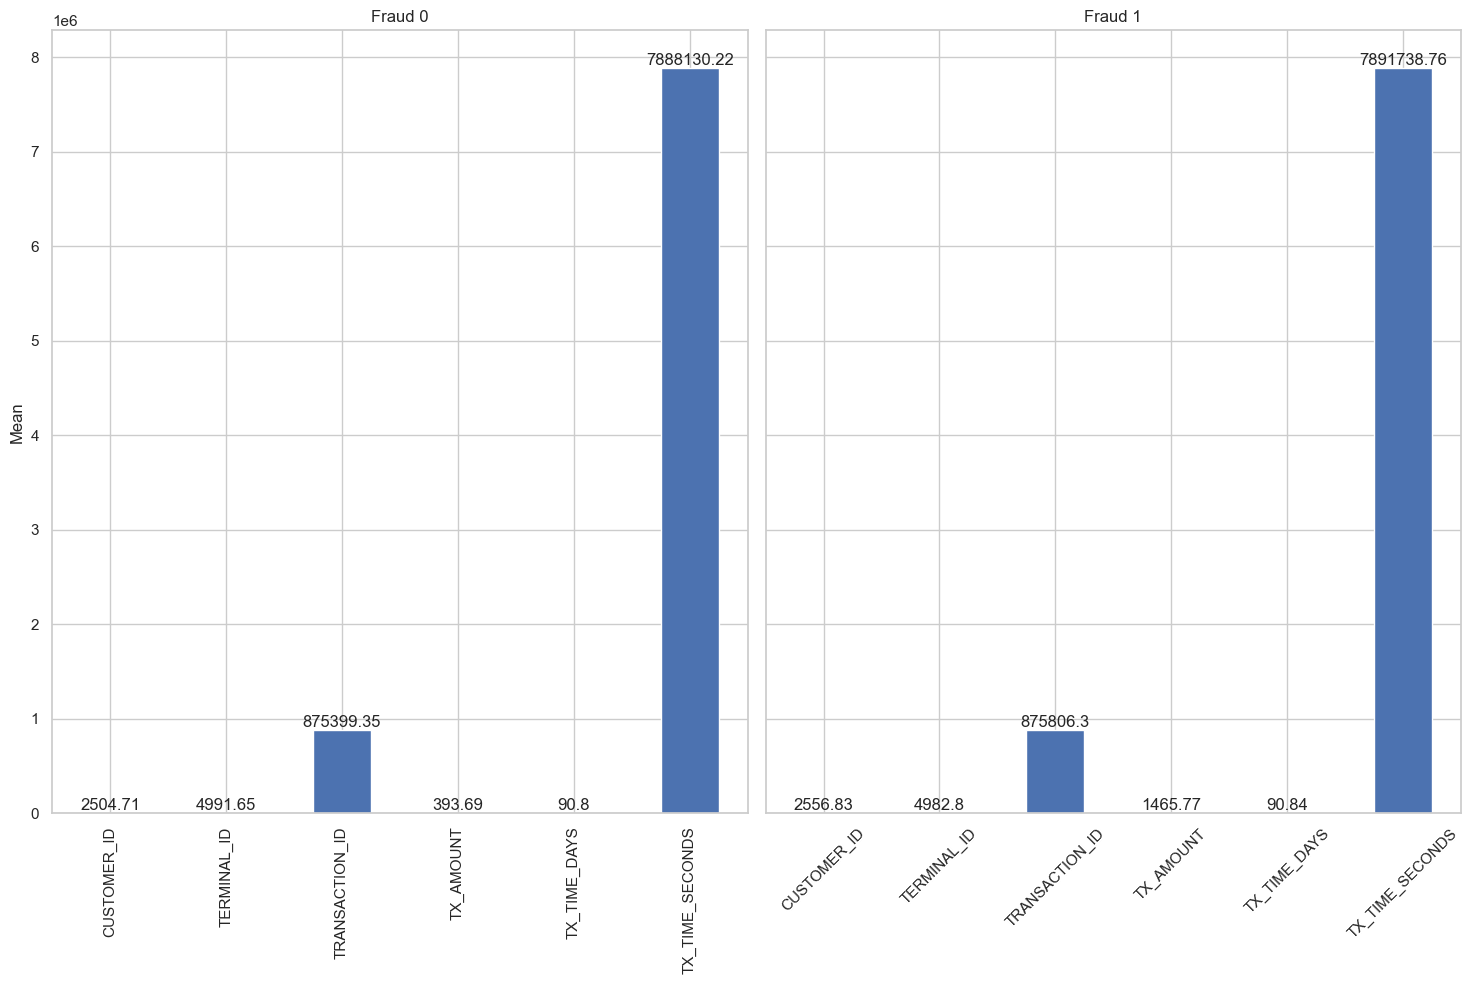

In [152]:
df_transposed = pivot_table_TX_FRAUD.T.reset_index()

# Mengubah hasil seleksi menjadi list
features_list = df_transposed.columns.to_list()
features_list.remove('TX_FRAUD')

# Memanggil fungsi plot_bar dengan fitur-fitur besar skala dan pivot_table
plot_bar(features_list, pivot_table_TX_FRAUD)

Berdasarkan Visulisasi diatas, hasil analisis dataset menunjukkan bahwa transaksi fraud cenderung melibatkan pelanggan dengan nilai CUSTOMER_ID lebih tinggi dan jumlah transaksi (TX_AMOUNT) yang signifikan. Namun, tidak ada pola yang jelas terkait waktu transaksi atau urutan transaksi. Deteksi fraud lebih terkait dengan nilai transaksi tinggi dan karakteristik pelanggan daripada faktor waktu.

In [101]:
# membuat fungsi describe untuk TX_FRAUD
def describe_TX_FRAUD(df, TX_FRAUD_column, target_TX_FRAUD):
    # Memfilter DataFrame berdasarkan TX_FRAUD yang ditentukan
    TX_FRAUD_data = df[df[TX_FRAUD_column] == target_TX_FRAUD]
    
    # Menghasilkan statistik describe untuk TX_FRAUD yang ditentukan
    TX_FRAUD_description = TX_FRAUD_data.describe()

    print(f"\nTX_FRAUD {target_TX_FRAUD} Statistics:")
    return TX_FRAUD_description

In [102]:
describe_TX_FRAUD(eda,'TX_FRAUD',0)


TX_FRAUD 0 Statistics:


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD
count,4.327000e+04,43270,43270.000000,43270.000000,43270.000000,4.327000e+04,43270.000000,43270.0
mean,8.753994e+05,2023-04-02 07:08:50.220591360,2504.713081,4991.647839,393.688724,7.888130e+06,90.798498,0.0
min,2.900000e+01,2023-01-01 00:28:12,0.000000,0.000000,0.010000,1.692000e+03,0.000000,0.0
25%,4.374700e+05,2023-02-15 13:12:07.750000128,1254.000000,2483.000000,152.452500,3.935528e+06,45.000000,0.0
50%,8.745570e+05,2023-04-02 07:08:02.500000,2499.000000,5008.000000,354.285000,7.888082e+06,91.000000,0.0
75%,1.313890e+06,2023-05-18 03:14:56,3766.750000,7492.000000,605.712500,1.184850e+07,137.000000,0.0
max,1.754074e+06,2023-07-02 23:06:23,4999.000000,9999.000000,999.950000,1.580798e+07,182.000000,0.0
std,5.068269e+05,NaN,1444.167062,2888.394091,275.079662,4.569135e+06,52.882240,0.0


Menampilkan data deskriptif untuk non-fraud
- Rata-rata jumlah transaksi (TX_AMOUNT) sekitar 393.69 dengan variasi yang cukup signifikan.
- Rentang waktu transaksi yang luas mencakup seluruh rentang dalam dataset, menunjukkan distribusi waktu yang merata.
- Tidak ada indikasi bahwa transaksi non-fraud terkait dengan kelompok pelanggan tertentu.
- Tidak ada pola khusus dalam TERMINAL_ID yang dapat diidentifikasi untuk transaksi non-fraud.
- Rata-rata TRANSACTION_ID tidak menunjukkan perbedaan mencolok antara transaksi non-fraud, menunjukkan distribusi urutan transaksi yang merata.

In [103]:
describe_TX_FRAUD(eda,'TX_FRAUD',1)


TX_FRAUD 1 Statistics:


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD
count,6.730000e+03,6730,6730.000000,6730.000000,6730.000000,6.730000e+03,6730.000000,6730.0
mean,8.758063e+05,2023-04-02 08:08:58.755126272,2556.831798,4982.795097,1465.769459,7.891739e+06,90.839227,1.0
min,4.160000e+02,2023-01-01 03:16:51,0.000000,0.000000,1.740000,1.181100e+04,0.000000,1.0
25%,4.513475e+05,2023-02-17 00:56:17.750000128,1273.000000,2457.500000,1085.465000,4.064178e+06,47.000000,1.0
50%,8.628585e+05,2023-03-31 22:27:47,2587.000000,4987.000000,1209.740000,7.770467e+06,89.000000,1.0
75%,1.319636e+06,2023-05-18 14:08:51,3806.000000,7524.250000,1407.492500,1.188773e+07,137.000000,1.0
max,1.753825e+06,2023-07-02 21:18:23,4998.000000,9999.000000,39567.750000,1.580150e+07,182.000000,1.0
std,5.046565e+05,NaN,1470.742149,2906.945329,2088.599487,4.549541e+06,52.654158,0.0


Menampilkan data deskriptif untuk fraud
- Nilai CUSTOMER_ID yang beragam menunjukkan variasi pelanggan yang terlibat dalam transaksi fraud.
- Tidak ada pola khusus dalam TERMINAL_ID yang dapat diidentifikasi untuk transaksi fraud.
- Jumlah transaksi fraud cenderung jauh lebih tinggi daripada transaksi normal.

## Pemahaman Distribusi Fitur pada Transaksi Fraud: Boxplot Analysis

In [150]:
# Fungsi untuk membuat boxplot
def visualize_boxplots(features_to_visualize, subplot_shape, df):
   
    sns.set(style="whitegrid")

    # Membuat subplot
    fig, axes = plt.subplots(nrows=subplot_shape[0], ncols=subplot_shape[1], figsize=(15, 10))

    # Meratakan sumbu untuk memudahkan iterasi
    axes = axes.flatten()

    # Menampilkan boxplot untuk setiap fitur
    for i, feature in enumerate(features_to_visualize):
        sns.boxplot(x='TX_FRAUD', y=feature, data=df, ax=axes[i])
        axes[i].set_title(f'{feature} vs TX_Fraud')

    plt.tight_layout()
    plt.show()

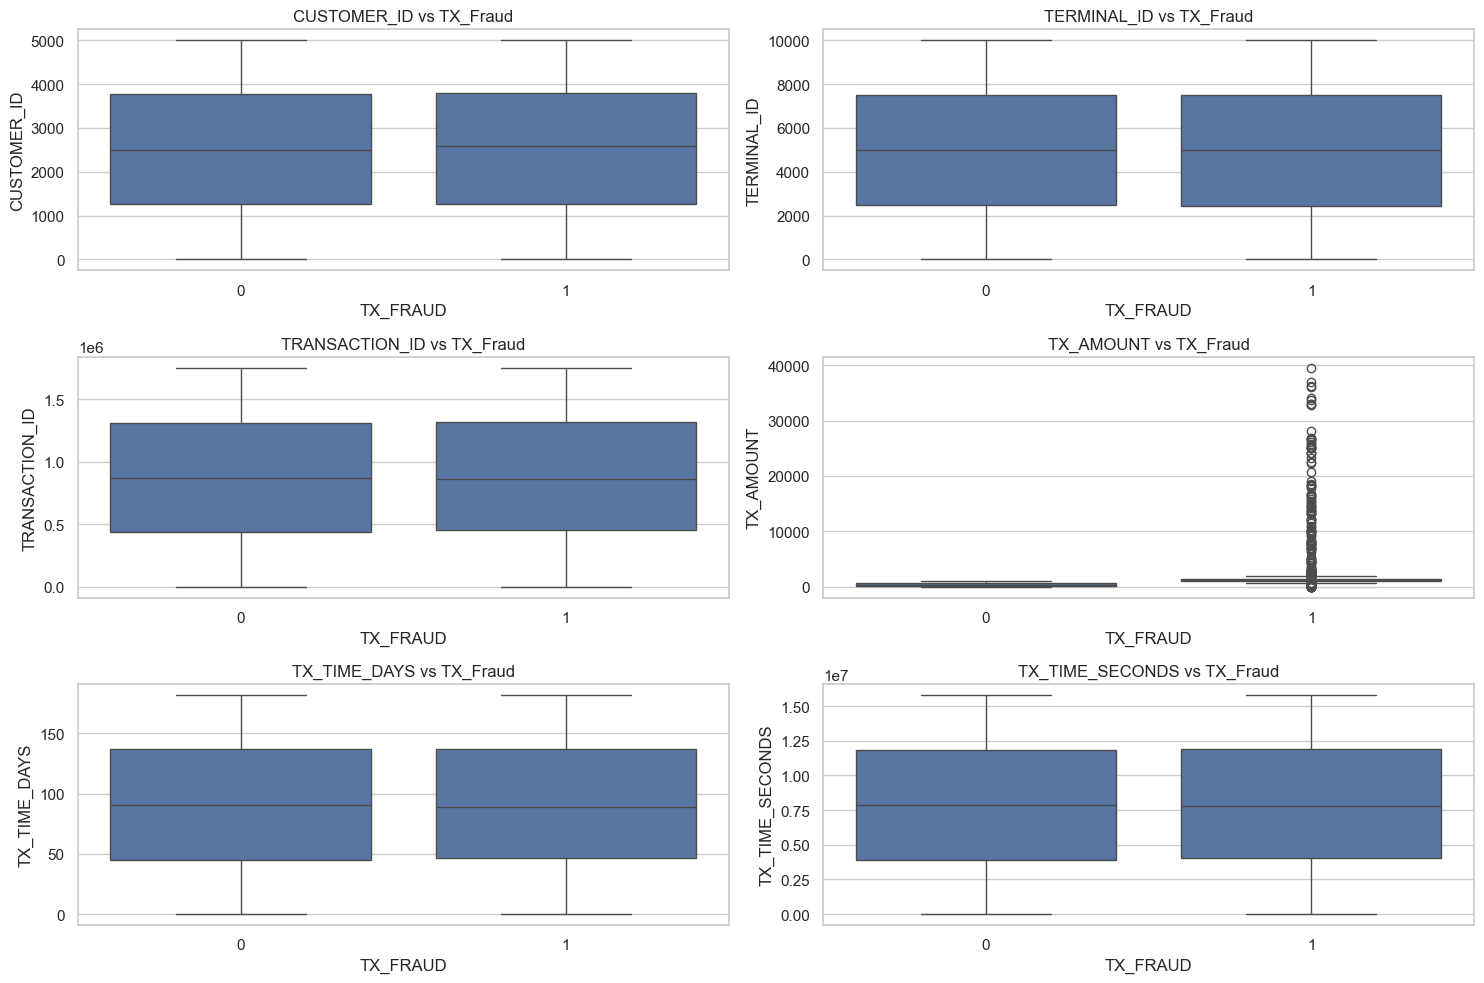

In [153]:
# Menampilkan boxplot untuk fitur-fitur skala kecil
visualize_boxplots(features_list, (3, 2), eda)

- Transaksi non-fraud memiliki variasi yang cukup signifikan dalam jumlah, waktu, dan identifikasi pelanggan serta terminal. Tidak ada pola khusus atau kelompok pelanggan tertentu yang dapat diidentifikasi sebagai indikator transaksi non-fraud.
- Transaksi fraud menunjukkan variasi yang signifikan dalam jumlah, waktu, dan identifikasi pelanggan. Jumlah transaksi fraud cenderung jauh lebih tinggi daripada transaksi normal. Tetapi tidak ada pola yang jelas dalam identifikasi terminal yang dapat diidentifikasi untuk transaksi fraud.

## Perbandingan Trend Jumlah Transaksi Fraud dan Non-Fraud per Hari: Lineplot Analysis

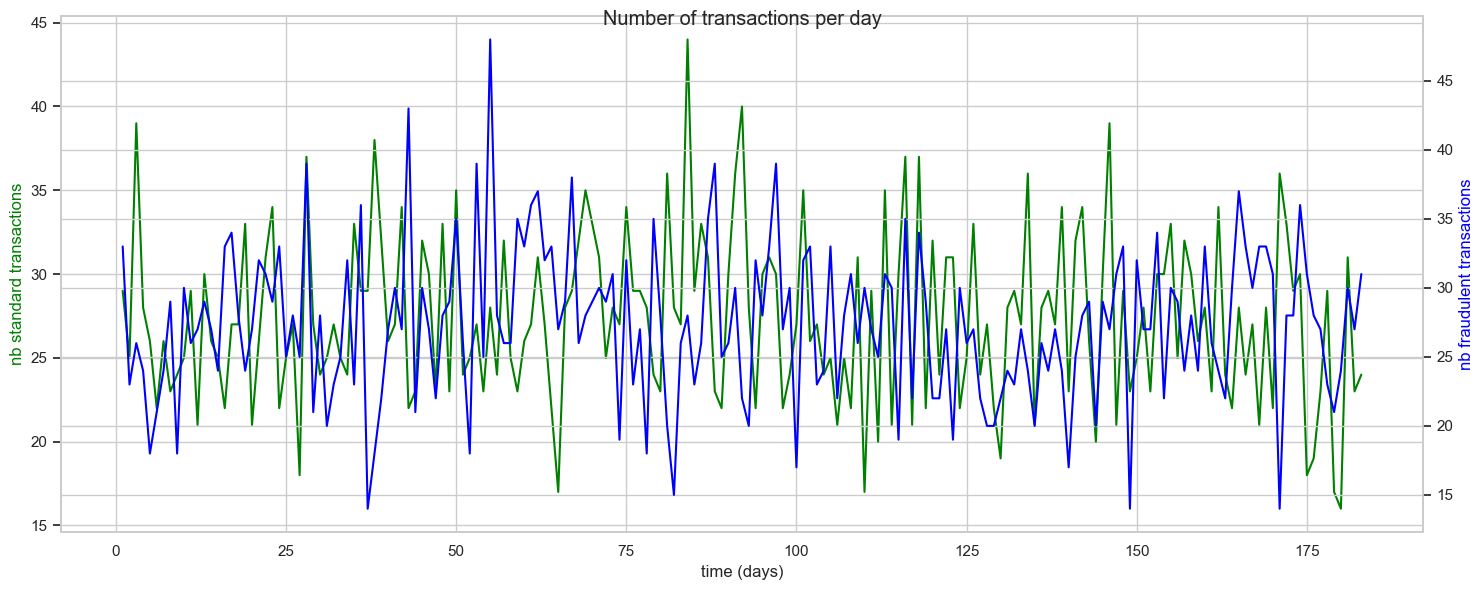

In [106]:
# Pisahkan data menjadi dua himpunan bagian berdasarkan nilai TX_FRAUD
fraudulent_data = eda[eda['TX_FRAUD'] == 1].sample(n=5000, random_state=42)
non_fraudulent_data = eda[eda['TX_FRAUD'] == 0].sample(n=5000, random_state=42)

# Gabungkan himpunan bagian untuk membuat kumpulan data yang seimbang
balanced_data = pd.concat([fraudulent_data, non_fraudulent_data])

# Mengacak baris dalam set data yang seimbang
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Pisahkan data untuk plotting
X_standard = balanced_data[balanced_data['TX_FRAUD'] == 0].loc[:, ['TX_TIME_DAYS', 'TRANSACTION_ID']]
X_fraudulent = balanced_data[balanced_data['TX_FRAUD'] == 1].loc[:, ['TX_TIME_DAYS', 'TRANSACTION_ID']]
y_standard = X_standard.groupby(['TX_TIME_DAYS']).size()
y_fraudulent = X_fraudulent.groupby(['TX_TIME_DAYS']).size()

# Pastikan x memiliki panjang yang sama dengan y_standard dan y_fraudulent
x_standard = np.arange(1, len(y_standard) + 1)
x_fraudulent = np.arange(1, len(y_fraudulent) + 1)

# Plotting
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.set_xlabel('time (days)')
ax1.set_ylabel('nb standard transactions', color='green')  # Using green color
ax1.plot(x_standard, y_standard, color='green')  # Using green color
ax2 = ax1.twinx()
ax2.set_ylabel('nb fraudulent transactions', color='blue')  # Using blue color
ax2.plot(x_fraudulent, y_fraudulent, color='blue')  # Using blue color
fig.tight_layout()

plt.suptitle('Number of transactions per day')
plt.show()

Berdasarkan visualisasi transaksi per hari Subset data untuk transaksi fraud (warna biru) dan non-fraud (warna hijau) menunjukkan bahwa tidak terlihat pola yang konsisten atau jelas antara kedua kelas (fraud dan non-fraud) terkait fitur waktu (TX_TIME_DAYS). Dengan kata lain, tidak ada tren atau perubahan yang mencolok dalam distribusi jumlah transaksi per hari yang membedakan transaksi fraud dan non-fraud.

## Perbandingan Trend Jumlah Total Transaksi Fraud dan Non-Fraud per Hari: Lineplot Analysis

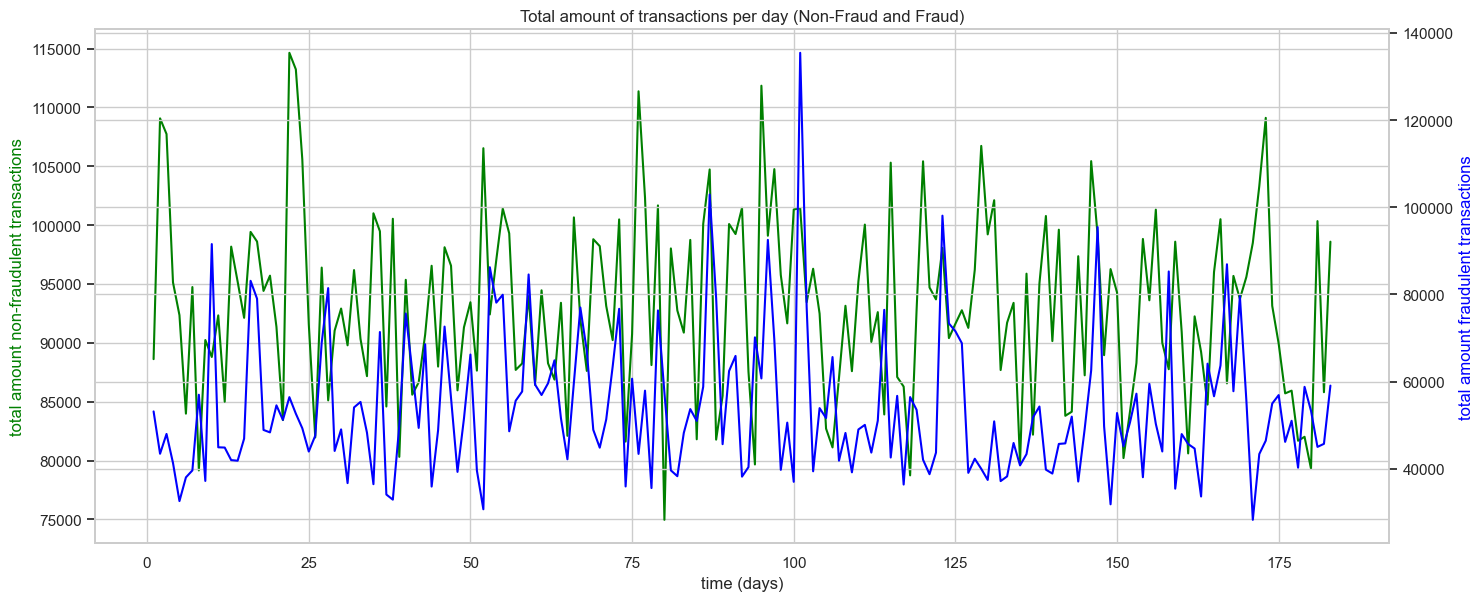

In [107]:
# Pisahkan data untuk plotting (hanya mempertimbangkan transaksi yang curang)
X_fraudulent = eda[eda['TX_FRAUD'] == 1].loc[:, ['TX_TIME_DAYS', 'TX_AMOUNT']]
y_fraudulent = X_fraudulent.groupby(['TX_TIME_DAYS']).aggregate('sum')
x_fraudulent = np.arange(1, len(y_fraudulent) + 1)

# Data terpisah untuk transaksi yang tidak curang
X_non_fraudulent = eda[eda['TX_FRAUD'] == 0].loc[:, ['TX_TIME_DAYS', 'TX_AMOUNT']]
y_non_fraudulent = X_non_fraudulent.groupby(['TX_TIME_DAYS']).aggregate('sum')
x_non_fraudulent = np.arange(1, len(y_non_fraudulent) + 1)

# Merencanakan transaksi yang bukan penipuan dan penipuan
fig, ax1 = plt.subplots(figsize=(15, 6))
ax1.set_xlabel('time (days)')

# Merencanakan transaksi non-fraud dengan warna biru
ax1.set_ylabel('total amount non-fraudulent transactions', color='green')
ax1.plot(x_non_fraudulent, y_non_fraudulent, color='green')

# Membuat sumbu kembar untuk transaksi penipuan dengan warna merah
ax2 = ax1.twinx()
ax2.set_ylabel('total amount fraudulent transactions', color='blue')
ax2.plot(x_fraudulent, y_fraudulent, color='blue')

fig.tight_layout()
plt.title('Total amount of transactions per day (Non-Fraud and Fraud)')
plt.show()

Berdasarkan total jumlah transaksi per hari,Subset data untuk transaksi fraud (warna biru) dan non-fraud (warna hijau) tidak tampak adanya pola yang konsisten atau jelas yang membedakan antara transaksi fraud dan non-fraud. Dengan kata lain, tidak terdapat tren atau perubahan yang mencolok dalam distribusi total jumlah transaksi per hari yang memisahkan transaksi fraud dan non-fraud.

## Distribusi Transaksi Per Jam

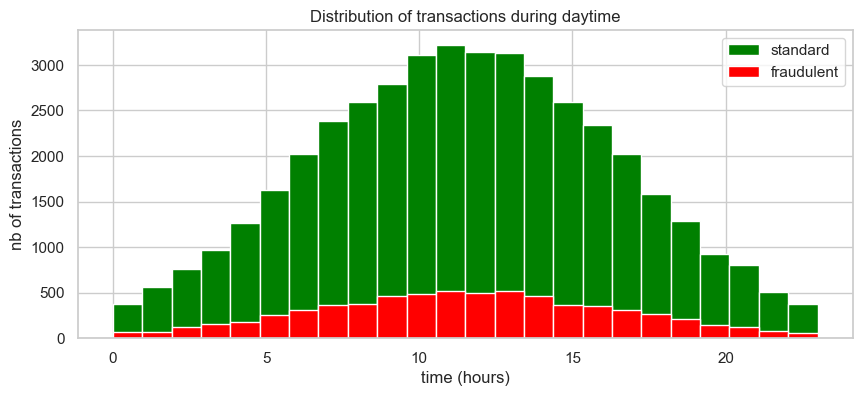

In [108]:
eda['TX_TIME_HOURS'] = eda['TX_DATETIME'].dt.hour

# Pisahkan data untuk plotting
standard = eda[eda['TX_FRAUD'] == 0].loc[:, ['TX_TIME_HOURS', 'TRANSACTION_ID']]
fraudulent = eda[eda['TX_FRAUD'] == 1].loc[:, ['TX_TIME_HOURS', 'TRANSACTION_ID']]

plt.figure(figsize=(10, 4))
plt.grid(True, which='major', axis='y')
plt.hist(standard['TX_TIME_HOURS'], bins=24, label='standard', color='green')  # Using green color
plt.hist(fraudulent['TX_TIME_HOURS'], bins=24, label='fraudulent', color='red')  # Using red color
plt.title('Distribution of transactions during daytime')
plt.xlabel('time (hours)')
plt.ylabel('nb of transactions')
plt.legend()
plt.show()

Dari visualisasi diatas, Subset data untuk transaksi fraud (warna merah) dan non-fraud (warna hijau) dapat disimpulkan bahwa distribusi transaksi pada jam-jam tertentu dalam sehari menunjukkan pola yang sesuai dengan harapan, dengan lonceng Gaussian yang baik untuk kedua kelas. Meskipun ada pola umum seperti puncak transaksi pada jam 1 siang, tidak terlihat pola yang jelas yang dapat membedakan antara transaksi fraud dan non-fraud.

# Featuring Engineering

## Correlation

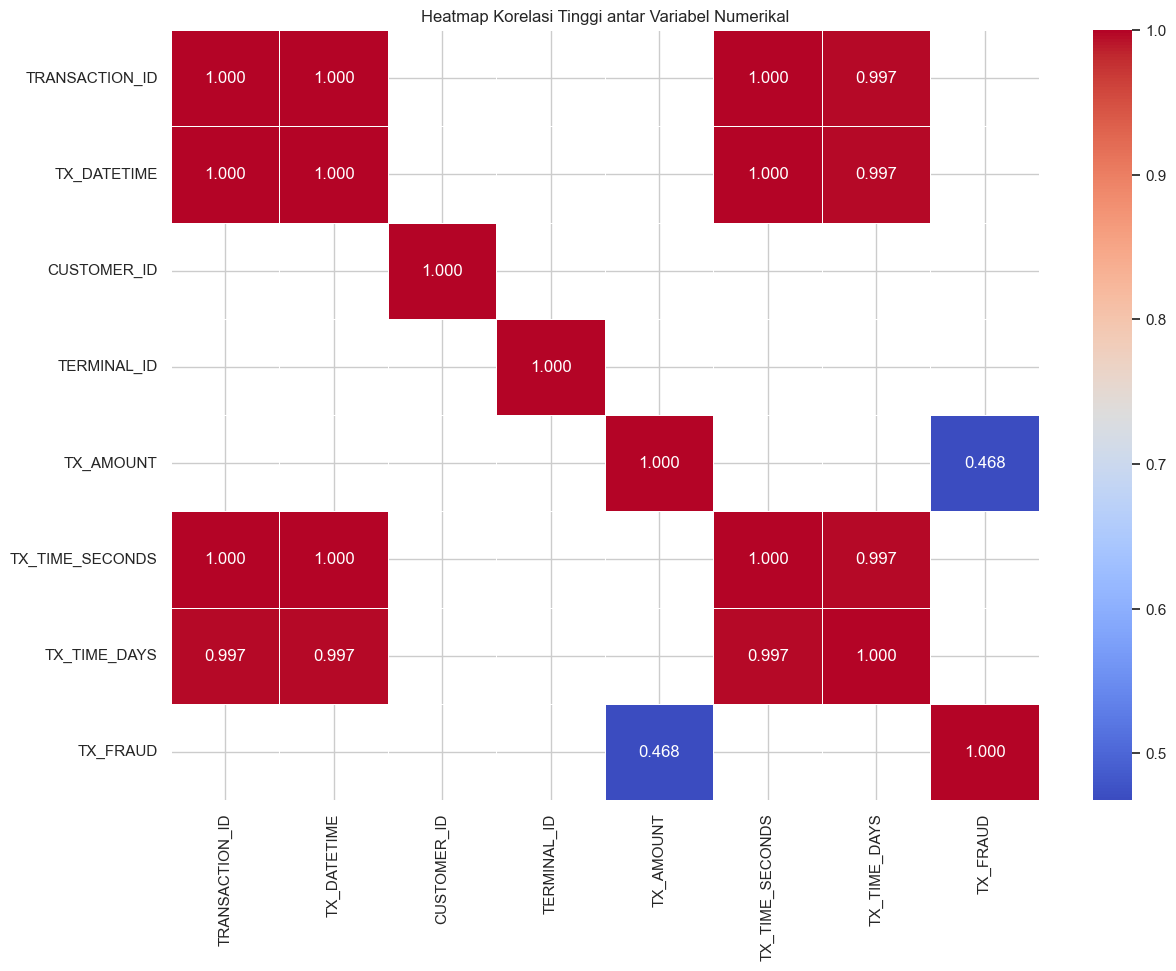

In [109]:
# perhitungan korelasi
numerik_col = df.corr(method="kendall")

# Ambil korelasi tinggi (>|0.1|)
high_correlation_numerik = numerik_col[(numerik_col > 0.1) | (numerik_col < -0.1)]

# Membuat heatmap untuk visualisasi korelasi tinggi
plt.figure(figsize=(14, 10))
sns.heatmap(high_correlation_numerik, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".3f")
plt.title("Heatmap Korelasi Tinggi antar Variabel Numerikal")
plt.show()

Faktor yang memiliki korelasi signifikan dengan status fraud adalah jumlah transaksi (TX_AMOUNT), sementara variabel lainnya tidak menunjukkan hubungan yang kuat.

## Multicolinearity

In [110]:
# Fungsi untuk menghitung Variance Inflation Factor (VIF)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [111]:
df1 = df.drop(['TX_FRAUD','TX_DATETIME'], axis = 1)
calc_vif(df1)

,variables,VIF
0,TRANSACTION_ID,2.897104e+06
1,CUSTOMER_ID,3.441356e+00
2,TERMINAL_ID,3.443141e+00
3,TX_AMOUNT,1.345475e+00
4,TX_TIME_SECONDS,4.767952e+06
5,TX_TIME_DAYS,3.582234e+05


Dalam hal mendeteksi fraud (TX_FRAUD), perlu mempertimbangkan dampak multicollinearity pada TRANSACTION_ID dan TX_TIME_SECONDS.sedangkan untuk CUSTOMER_ID dan TERMINAL_ID nampaknya menyediakan informasi yang cukup unik satu sama lain. Meskipun korelasi antara TX_AMOUNT dan TX_TIME_DAYS tidak terlalu kuat, namun perlu diberikan perhatian.

In [112]:
df1 = df1.drop(['TRANSACTION_ID','TX_TIME_SECONDS','TX_TIME_DAYS'], axis = 1)
calc_vif(df1)

,variables,VIF
0,CUSTOMER_ID,2.363063
1,TERMINAL_ID,2.348345
2,TX_AMOUNT,1.300801


CUSTOMER_ID, TERMINAL_ID, dan TX_AMOUNT memiliki VIF yang rendah, menunjukkan bahwa ketiganya memberikan informasi yang cukup berbeda satu sama lain dan dapat dipertahankan dalam model deteksi fraud.

Selanjutkan saya merekomendasikan penggunaan PCA pada kode program selanjutnya untuk mengurangi dimensi fitur dan mengatasi multicollinearity, khususnya karena fitur-fitur yang saya gunakan memiliki korelasi rendah, dan dengan menggunakan PCA, diharapkan dapat meningkatkan efisiensi komputasi sambil tetap mempertahankan informasi krusial dan fokus pada pola umum dalam data. maka dari itu untuk fitur yang akan digunakan adalah TRANSACTION_ID, CUSTOMER_ID, TERMINAL_ID, TX_AMOUNT, TX_TIME_SECONDS dan TX_TIME_DAYS

## Split Data

In [113]:
# Memisahkan variabel independen (X) dan variabel dependen (y)
X = df.drop(['TX_FRAUD','TX_DATETIME'], axis = 1)
y = df['TX_FRAUD']

# Membagi data menjadi data latih dan data uji dengan test_size 10% dan random_state 0
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 0)

# Menampilkan ukuran data latih dan data uji
print('Train size : ', X_train.shape)
print('Test size : ', X_test.shape)

Train size :  (45000, 6)
Test size :  (5000, 6)


Memisahkan variabel independen dan dependen, membagi data menjadi data latih (45,000 sampel) dan data uji (5,000 sampel) dengan proporsi 90:10 

Datetime tidak dijadikan fitur karena informasi waktu dalam bentuk datetime mungkin sulit diolah secara langsung oleh model, memerlukan ekstraksi fitur tambahan, dan tidak memberikan kontribusi signifikan terhadap deteksi fraud, sehingga penekanan diberikan pada fitur-fitur yang lebih relevan dan dapat memberikan informasi yang lebih berharga bagi model.

In [114]:
# Menampilkan distribusi nilai pada y_test dan y_train
print(y_train.value_counts())
print(y_test.value_counts())

TX_FRAUD
0    38933
1     6067
Name: count, dtype: int64
TX_FRAUD
0    4337
1     663
Name: count, dtype: int64


Distribusi ini menunjukkan ketidakseimbangan kelas, di mana jumlah sampel untuk kelas non-fraud jauh lebih banyak dibandingkan dengan kelas fraud pada kedua set data.tetapi saya berencana untuk mencoba model dengan ketidakseimbangan kelas tersebut, karena meskipun terjadi ketidakseimbangan, pengujian ini masih layak dilakukan. Langkah ini dilakukan karena evaluasi performa model nantinya akan melibatkan perbandingan di antara lima model yang berbeda. Meskipun ada ketidakseimbangan saya dapat menggunakan metrik evaluasi yang sesuai untuk mengevaluasi dan membandingkan performa model secara obyektif.

## Cardinality

In [115]:
# Fungsi untuk menampilkan jumlah data unik untuk setiap kolom
def print_unique_categories(df, columns):
    for col in columns:
        unique_categories = len(df[col].unique())
        print(f'Jumlah data unik {col: <17}: {unique_categories}')

    total_categories = len(df)
    print(f'Total dataset {" " * 20}: {total_categories}')

# Menampilkan jumlah data unik untuk setiap kolom pada data latih
print_unique_categories(X_train, X_train.columns)

Jumlah data unik TRANSACTION_ID   : 45000
Jumlah data unik CUSTOMER_ID      : 4715
Jumlah data unik TERMINAL_ID      : 9830
Jumlah data unik TX_AMOUNT        : 37184
Jumlah data unik TX_TIME_SECONDS  : 44912
Jumlah data unik TX_TIME_DAYS     : 183
Total dataset                     : 45000


Berdasarkan data tersebut yang mencakup variabel numerik adalah TX_AMOUNT, TX_TIME_SECONDS, dan TX_TIME_DAYS, serta variabel kategorik adalah TRANSACTION_ID, CUSTOMER_ID, dan TERMINAL_ID.

## Handling Outlier

In [116]:
#Pilih fitur numerik dan kategorikal pada data latih
numeric_features= X_train[['TX_AMOUNT','TX_TIME_SECONDS','TX_TIME_DAYS']]
categoric_features= X_train[['TRANSACTION_ID','CUSTOMER_ID','TERMINAL_ID']]

# Menampilkan nilai skewness untuk setiap kolom dalam DataFrame df1
for i in numeric_features:
    print(f'Nilai Skew data {i: <35}: {X_train[i].skew()}')

Nilai Skew data TX_AMOUNT                          : 22.197814166432238
Nilai Skew data TX_TIME_SECONDS                    : 0.002081407556784401
Nilai Skew data TX_TIME_DAYS                       : 0.002011694455038303


Berdasarkan data diatas menunjukkan skewness yang tinggi pada TX_AMOUNT, disarankan untuk menggunakan metode IQR dalam penanganan outlier. Sementara itu TX_TIME_SECONDS dan TX_TIME_DAYS yang memiliki skewness mendekati nol dapat menggunakan metode Gaussian (z-score) untuk mengatasi outlier. Handling outlier dapat meningkatkan keandalan model dan hasil analisis.

In [117]:
# Melakukan winsorizing menggunakan metode IQR
for i in numeric_features[['TX_AMOUNT']]:
    wz_numeric = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=[i])
    X_train[i] = wz_numeric.fit_transform(X_train[[i]])
    
# Melakukan winsorizing menggunakan metode Gaussian
for i in numeric_features[['TX_TIME_SECONDS','TX_TIME_DAYS']]:
    wz_numeric = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=[i])
    X_train[i] = wz_numeric.fit_transform(X_train[[i]])

TX_AMOUNT - Before Capping


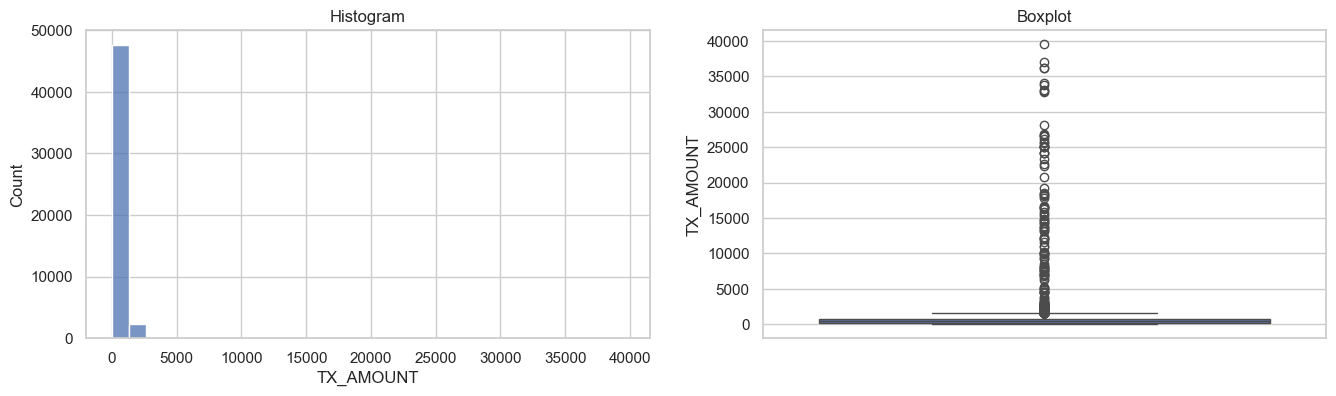

TX_AMOUNT - After Capping


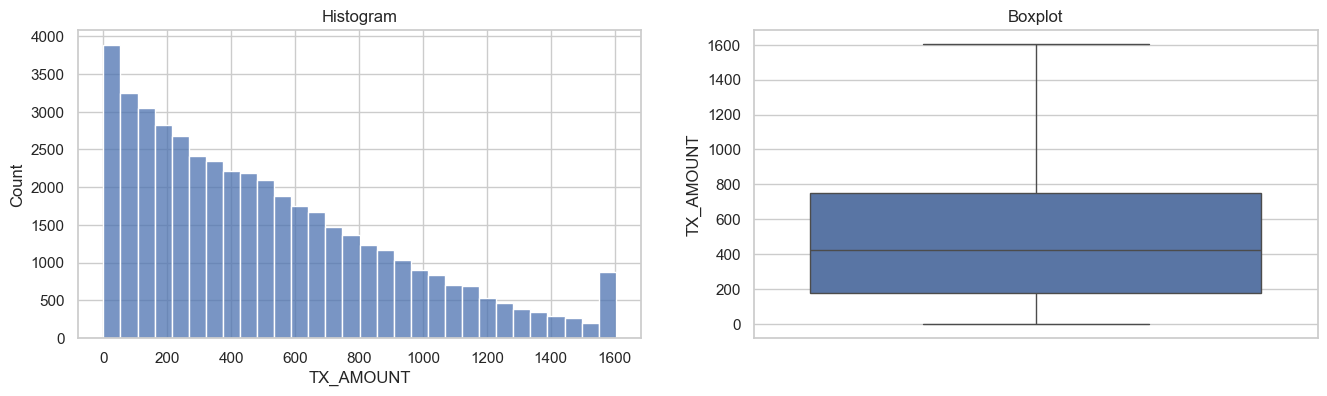

TX_TIME_SECONDS - Before Capping


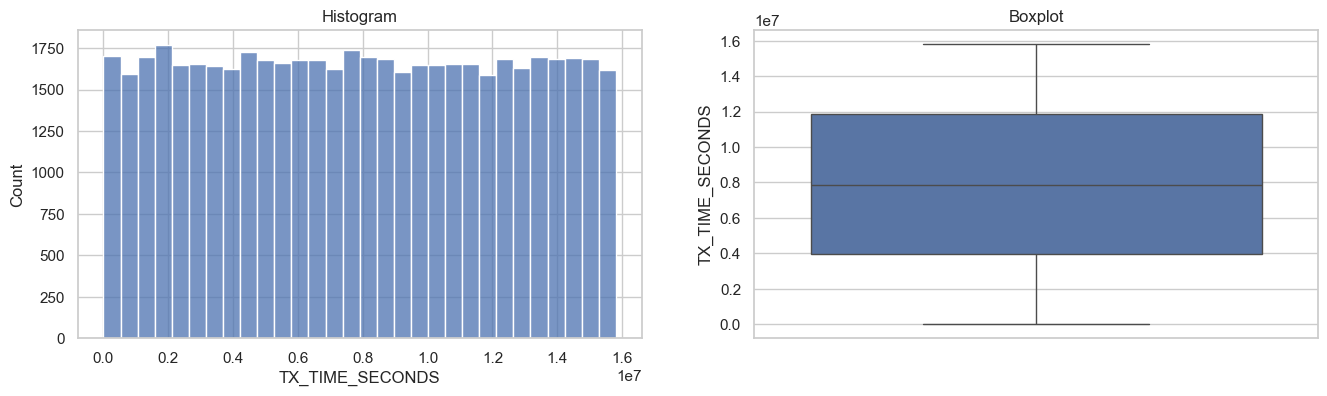

TX_TIME_SECONDS - After Capping


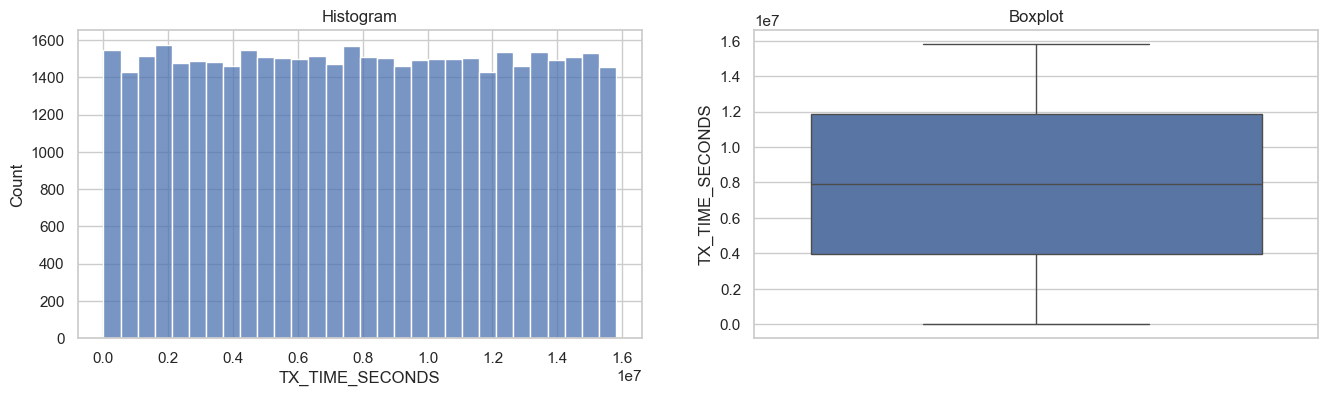

TX_TIME_DAYS - Before Capping


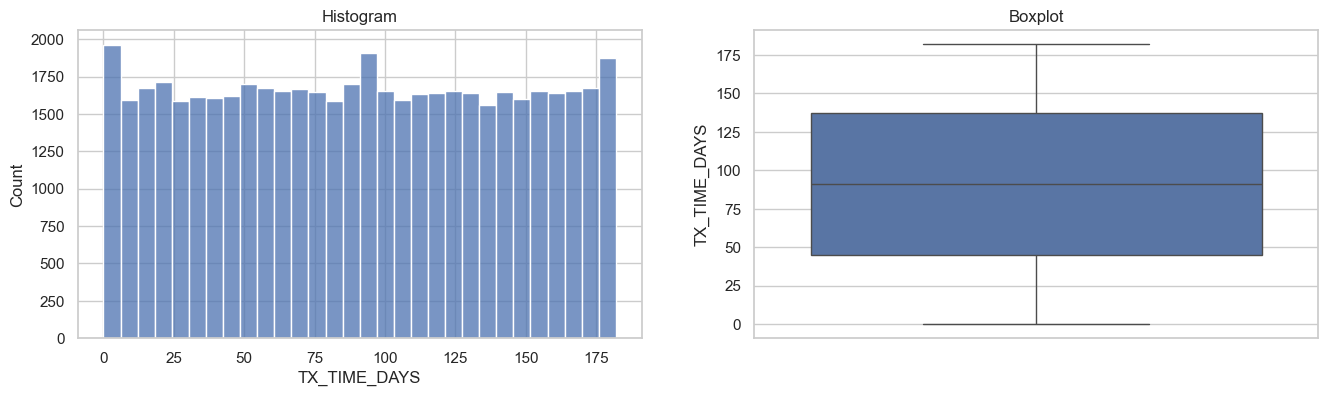

TX_TIME_DAYS - After Capping


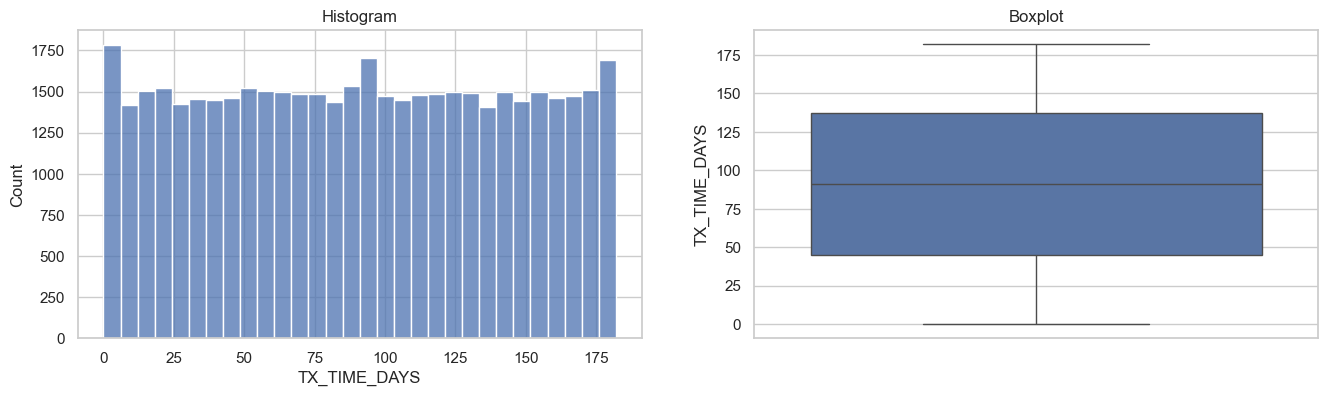

In [118]:
# Fungsi untuk membuat plot histogram dan boxplot sebelum dan sesudah capping
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# Menampilkan plot sebelum dan sesudah capping untuk fitur
for i in numeric_features :
    print(f'{i} - Before Capping')
    diagnostic_plots(df, i)

    print(f'{i} - After Capping')
    diagnostic_plots(X_train, i)

## Preprocessing Pipeline: Scaling dan PCA

In [119]:
# Memilih scaler berdasarkan skewness fitur numerik
norm = 0
nonorm = 0
for col in numeric_features:
  if X_train[col].skew() >=-0.5 and X_train[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

StandardScaler()

 Pemilihan scaler (StandardScaler) didasarkan pada ciri-ciri distribusi fitur numerik dalam dataset, dengan kecenderungan menggunakan StandardScaler ketika fitur-fitur tersebut mendekati distribusi normal.

In [120]:
list_numeric = numeric_features.columns.to_list()
list_categoric = categoric_features.columns.to_list()

# Membuat transformer untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.99))
])

# Menggabungkan transformer untuk semua fitur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list_numeric),
        ('cat', 'passthrough', list_categoric)  # Memperlakukan fitur kategorikal sebagai numerik
    ])

Selanjutnya, melakukan proses scaling dengan Standard Scaler untuk menormalkan skala fitur numerik, dilanjutkan dengan menerapkan PCA pada fitur-fitur TRANSACTION_ID, CUSTOMER_ID, TERMINAL_ID, TX_AMOUNT, TX_TIME_SECONDS, dan TX_TIME_DAYS. Saya merekomendasikan penggunaan PCA ini sebelumnya untuk mengurangi dimensi fitur dan mengatasi multicollinearity, terutama karena fitur-fitur tersebut memiliki korelasi rendah. Dengan menggunakan PCA, diharapkan dapat meningkatkan efisiensi komputasi sambil tetap mempertahankan informasi krusial dan fokus pada pola umum dalam data. Passthrough diterapkan pada fitur kategorikal karena pada situasi ini, fitur kategorikal telah berupa representasi numerik. Proses ini dilakukan menggunakan column transformers dan pipeline dalam kode program.

# Model Definition

In [121]:
model_knn = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

Pemilihan parameter default pada model KNeighborsClassifier dilakukan untuk memperoleh baseline performance model tanpa melakukan tuning parameter khusus. 
- Kelebihan dari penggunaan parameter default termasuk kemudahan implementasi dan penggunaan model tanpa perlu penyesuaian tambahan. Selain itu, parameter default dapat memberikan gambaran awal tentang kinerja model tanpa harus melibatkan proses tuning yang memakan waktu.
- Namun, kelemahannya adalah parameter default mungkin tidak optimal untuk dataset tertentu, dan performa model dapat ditingkatkan dengan penyesuaian parameter sesuai dengan karakteristik data.


In [122]:
# Menggabungkan preprocessing dan model Support Vector Machine dalam satu pipeline
model_svm = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', SVC())
])

Saya memilih menggunakan model Support Vector Classifier (SVC) dengan parameter default karena parameter default merupakan konfigurasi standar yang telah disesuaikan oleh pembuat model untuk memberikan keseimbangan dan kinerja yang baik secara umum. Penggunaan parameter default memungkinkan saya untuk mendapatkan hasil awal yang dapat dijadikan dasar perbandingan dengan model-model lain tanpa memerlukan penyesuaian yang kompleks. Selain itu, hal ini memberikan gambaran awal tentang potensi kinerja model pada dataset tanpa melakukan tuning yang mendalam.
- Kelebihan dari SVC melibatkan kemampuannya dalam menangani data dengan dimensi tinggi dan kemampuan untuk menangani pemisahan kelas yang tidak linear melalui transformasi kernel. 
- Namun, kekurangannya termasuk sensitivitas terhadap skala fitur dan kebutuhan komputasi yang tinggi terutama pada dataset besar. Meskipun demikian, penggunaan SVC menjadi relevan ketika dataset memiliki struktur yang kompleks dan tidak linier.

In [123]:
# Menggabungkan preprocessing dan model RandomForestClassifier dalam satu pipeline
model_random_forest = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier())
])

Saya memilih menggunakan model RandomForestClassifier dalam pipelinenya dengan parameter default karena konfigurasi default telah diatur oleh pengembang untuk memberikan keseimbangan dan kinerja yang baik secara umum. Penggunaan parameter default memungkinkan saya untuk mendapatkan hasil awal yang dapat dijadikan dasar perbandingan dengan model-model lain tanpa perlu penyesuaian yang rumit.
- Kelebihan dari RandomForestClassifier melibatkan kemampuannya untuk menangani kompleksitas dataset dan menangani masalah overfitting dengan baik. Model ini juga dapat memberikan informasi tentang kepentingan fitur dalam prediksi. 
- Namun, kekurangannya termasuk interpretabilitas yang lebih rendah dan kecenderungan untuk memerlukan lebih banyak waktu komputasi dibandingkan dengan model yang lebih sederhana.

Dengan menggunakan parameter default, saya dapat memperoleh gambaran awal tentang kinerja model pada dataset tanpa perlu melakukan tuning parameter yang mendalam.

In [124]:
# Menggabungkan preprocessing dan model DecisionTreeClassifier dalam satu pipeline
model_decision_tree = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier())
])

Saya memilih menggunakan model DecisionTreeClassifier dalam pipelinenya dengan parameter default karena konfigurasi default telah diatur oleh pengembang untuk memberikan keseimbangan dan kinerja yang baik secara umum. Penggunaan parameter default memungkinkan saya untuk mendapatkan hasil awal yang dapat dijadikan dasar perbandingan dengan model-model lain tanpa perlu penyesuaian yang rumit.

- Kelebihan dari DecisionTreeClassifier melibatkan kemampuannya untuk menangani dataset dengan cepat dan dapat dengan mudah diinterpretasikan. Model ini juga bisa menangani baik data numerik maupun kategorikal. 
- Namun, kekurangannya termasuk kecenderungan untuk overfitting pada data yang kompleks.

Dengan menggunakan parameter default, saya dapat memperoleh gambaran awal tentang kinerja model pada dataset tanpa perlu melakukan tuning parameter yang mendalam.

In [125]:
# Menggabungkan preprocessing dan model XGBClassifier dalam satu pipeline
model_xgb = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBClassifier())
])

Saya memilih menggunakan model XGBClassifier dalam pipelinenya dengan parameter default karena konfigurasi default telah diatur oleh pengembang untuk memberikan keseimbangan dan kinerja yang baik secara umum. Penggunaan parameter default memungkinkan saya untuk mendapatkan hasil awal yang dapat dijadikan dasar perbandingan dengan model-model lain tanpa perlu penyesuaian yang rumit.

- Kelebihan dari XGBClassifier adalah banyak dipilih dalam tugas klasifikasi karena mampu menangani berbagai jenis dataset, memiliki ketahanan terhadap overfitting, dan kecepatan komputasi tinggi. Selain itu, model ini juga dapat mengatasi data yang tidak seimbang dengan baik, dan memiliki tingkat interpretabilitas yang memuaskan.
- Namun, kompleksitas XGBClassifier dapat menyulitkan interpretasi model.

Dengan menggunakan parameter default, saya dapat memperoleh gambaran awal tentang kinerja model pada dataset tanpa perlu melakukan tuning parameter yang mendalam.

# Model Training

## Training

In [126]:
model_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['TX_AMOUNT',
                                                   'TX_TIME_SECONDS',
                                                   'TX_TIME_DAYS']),
                                                 ('cat', 'passthrough',
                                                  ['TRANSACTION_ID',
                                                   'CUSTOMER_ID',
                                                   'TERMINAL_ID'])])),
                ('model', KNeighborsClassifier())])

In [127]:
model_decision_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['TX_AMOUNT',
                                                   'TX_TIME_SECONDS',
                                                   'TX_TIME_DAYS']),
                                                 ('cat', 'passthrough',
                                                  ['TRANSACTION_ID',
                                                   'CUSTOMER_ID',
                                                   'TERMINAL_ID'])])),
                ('model', DecisionTreeClassifier())])

In [128]:
model_random_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['TX_AMOUNT',
                                                   'TX_TIME_SECONDS',
                                                   'TX_TIME_DAYS']),
                                                 ('cat', 'passthrough',
                                                  ['TRANSACTION_ID',
                                                   'CUSTOMER_ID',
                                                   'TERMINAL_ID'])])),
                ('model', RandomForestClassifier())])

In [129]:
model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['TX_AMOUNT',
                                                   'TX_TIME_SECONDS',
                                                   'TX_TIME_DAYS']),
                                                 ('cat', 'passthrough',
                                                  ['TRANSACTION_ID',
                                                   'CUSTOMER_ID',
                                                   'TERMINAL_ID'])])),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [130]:
model_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.99))]),
                                                  ['TX_AMOUNT',
                                                   'TX_TIME_SECONDS',
                                                   'TX_TIME_DAYS']),
                                                 ('cat', 'passthrough',
                                                  ['TRANSACTION_ID',
                                                   'CUSTOMER_ID',
                                                   'TERMINAL_ID'])])),
                ('model', SVC())])

## Cross Validation

Dalam proses cross validation dan proses evaluasi terhadap scoring selanjutnya saya akan menggunakan dan fokus pada scoring recall, penggunaan recall dapat dijustifikasi karena fokusnya pada mendeteksi sebagian besar transaksi fraud, yang merupakan prioritas utama untuk mengurangi risiko melewatkan kasus fraud yang dapat berdampak serius, meskipun dengan pengorbanan sedikit peningkatan positif palsu.

In [131]:
# set skfold
skfold=StratifiedKFold(n_splits=5)

# checking cross validation score
cv_knn_model = cross_val_score(model_knn, X_train, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(model_svm, X_train, y_train, cv=skfold, scoring="recall")
cv_tree_model = cross_val_score(model_decision_tree, X_train, y_train, cv=skfold, scoring="recall")
cv_rdf_model = cross_val_score(model_random_forest, X_train, y_train, cv=skfold, scoring="recall")
cv_xgb_model = cross_val_score(model_xgb, X_train, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_knn_model,cv_svm_model,cv_tree_model,cv_rdf_model,cv_xgb_model],['knn_model','svm_model','decision_tree_model','random_forest_model','xgb_model']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

knn_model
recall - All - Cross Validation  :  [0.02143446 0.01566364 0.02225886 0.0247117  0.01812191]
recall - Mean - Cross Validation :  0.020438114821449672
recall - Std - Cross Validation  :  0.0031853320608365918
recall - Range of Test-Set       :  0.01725278276061308 - 0.023623446882286264
--------------------------------------------------
svm_model
recall - All - Cross Validation  :  [0. 0. 0. 0. 0.]
recall - Mean - Cross Validation :  0.0
recall - Std - Cross Validation  :  0.0
recall - Range of Test-Set       :  0.0 - 0.0
--------------------------------------------------
decision_tree_model
recall - All - Cross Validation  :  [0.95630668 0.97691674 0.95877988 0.96046129 0.96869852]
recall - Mean - Cross Validation :  0.9642326199831317
recall - Std - Cross Validation  :  0.00758428473167936
recall - Range of Test-Set       :  0.9566483352514523 - 0.9718169047148111
--------------------------------------------------
random_forest_model
recall - All - Cross Validation  :  [0.95

Dari hasil cross-validation, dapat informasi bahwa :

KNN Model (knn_model):
- Recall rata-rata sekitar 2.04% dengan deviasi standar sekitar 0.32%.
- Model KNN kurang efektif dalam mengidentifikasi transaksi fraud, karena nilai recall yang sangat rendah.

SVM Model (svm_model):
- Recall memiliki nilai 0% pada setiap split cross-validation.
- SVM tidak mampu mengenali transaksi fraud dengan baik berdasarkan hasil cross-validation.

Decision Tree Model (decision_tree_model):
- Recall rata-rata sekitar 96.42% dengan deviasi standar sekitar 0.78%.
- Model decision tree memiliki performa yang sangat baik dalam mendeteksi transaksi fraud, dengan nilai recall yang tinggi dan konsisten.

Random Forest Model (random_forest_model):
- Recall rata-rata sekitar 96.37% dengan deviasi standar sekitar 0.89%.
- Model random forest juga memberikan hasil yang baik, mendekati performa decision tree dalam mendeteksi fraud.

XGB Model (xgb_model):
- Recall rata-rata sekitar 95.86% dengan deviasi standar sekitar 1.12%.
- Model XGBClassifier memberikan performa yang tinggi dalam mendeteksi fraud, meskipun sedikit di bawah decision tree dan random forest.

Decision tree model menjadi pilihan terbaik dengan nilai recall tertinggi, menunjukkan kemampuan yang baik dalam mendeteksi transaksi fraud. Random forest juga memberikan hasil yang hampir sebanding dengan decision tree. KNN dan SVM tidak efektif dalam konteks ini, dengan performa yang sangat rendah.

# Model Evaluation

## Hyperparameter Tuning

Saat mencari model terbaik untuk mendeteksi transaksi fraud, saya memilih Decision Tree sebagai model dasar. Pilihan ini didasarkan pada performa yang baik selama proses cross-validation sebelumnya, serta kemampuan interpretasi yang mudah dari decision tree. Selanjutnya, saya melakukan hyperparameter tuning menggunakan GridSearchCV untuk memastikan model memiliki konfigurasi parameter terbaik.

Dalam hyperparameter tuning, saya mencoba beberapa variasi scaler seperti MinMaxScaler, StandardScaler, dan RobustScaler untuk fitur numerik. Selain itu, saya menggunakan PCA dengan menjaga 99% varians untuk mereduksi dimensi fitur numerik. Pemilihan kriteria (gini atau entropy), kedalaman maksimum, jumlah sampel minimum untuk split, dan jumlah sampel minimum untuk daun juga diuji untuk mendapatkan kombinasi terbaik.

Langkah-langkah ini diambil agar model dapat memiliki kinerja optimal dan dapat menggeneralisasi dengan baik pada data uji yang belum pernah dilihat sebelumnya. Semua ini merupakan bagian dari upaya untuk membangun model yang handal dan dapat diandalkan untuk mendeteksi transaksi fraud.

In [132]:
# Mendefinisikan parameter grid untuk GridSearchCV
params = [{'preprocess__num__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()], 
           'preprocess__num__pca__n_components': [0.99],
           'model__criterion': ['gini', 'entropy'],
           'model__max_depth': [10, 20, 30],
           'model__min_samples_split': [2, 5, 10],
           'model__min_samples_leaf': [1, 2, 4]}
          ]

# Membuat objek GridSearchCV
grid = GridSearchCV(model_decision_tree, params, cv=3, verbose=3, scoring='recall', error_score='raise')

# Melakukan grid search untuk pemilihan model terbaik
grid.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV 1/3] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, preprocess__num__pca__n_components=0.99, preprocess__num__scaler=MinMaxScaler();, score=0.963 total time=   0.2s
[CV 2/3] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, preprocess__num__pca__n_components=0.99, preprocess__num__scaler=MinMaxScaler();, score=0.962 total time=   0.2s
[CV 3/3] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, preprocess__num__pca__n_components=0.99, preprocess__num__scaler=MinMaxScaler();, score=0.965 total time=   0.2s
[CV 1/3] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, preprocess__num__pca__n_components=0.99, preprocess__num__scaler=StandardScaler();, score=0.964 total time=   0.1s
[CV 2/3] END model__criterion=gini,

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=0.99))]),
                                                                         ['TX_AMOUNT',
                                                                          'TX_TIME_SECONDS',
                                                                          'TX_TIME_DAYS']),
                                                                        ('cat',
                                                                         'passthrough',
                                                                         ['TRANSACTION_ID',
                                                                          'CUSTOMER_ID',
                                                                          'TERMINAL_ID'])])),
                                       ('model', DecisionTreeClassifier())]),
             param_grid=[{'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [10, 20, 30],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10],
                          'preprocess__num__pca__n_components': [0.99],
                          'preprocess__num__scaler': [MinMaxScaler(),
                                                      StandardScaler(),
                                                      RobustScaler()]}],
             scoring='recall', verbose=3)

In [133]:
grid.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 30,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'preprocess__num__pca__n_components': 0.99,
 'preprocess__num__scaler': StandardScaler()}

Hasil dari proses tuning hyperparameter menunjukkan bahwa model Decision Tree terbaik menggunakan kriteria 'gini' untuk pemilihan split, memiliki kedalaman maksimum pohon sebesar 30, jumlah sampel minimum untuk daun 1, jumlah sampel minimum untuk split 2, dan menerapkan PCA dengan mempertahankan 99% varians menggunakan StandardScaler untuk normalisasi fitur numerik. Konfigurasi ini dipilih untuk meningkatkan performa model dalam mendeteksi transaksi fraud dan diharapkan memberikan hasil yang baik pada data uji.

## Evaluation Score

In [134]:
if grid.best_score_>cv_tree_model.mean():
    print(f'Score Hypertuning : {grid.best_score_}')
    print(f'Score Baseline : {cv_tree_model.mean()}')
    print('Model dengan score terbaik : Hypertuning Decision Tree')
else:
    print(f'Score Hypertuning : {grid.best_score_}')
    print(f'Score Baseline : {cv_tree_model.mean()}')
    print('Model dengan score terbaik : Baseline Decision Tree')

Score Hypertuning : 0.9652213361052805
Score Baseline : 0.9642326199831317
Model dengan score terbaik : Hypertuning Decision Tree



Setelah proses hypertuning, model Decision Tree mengalami peningkatan performa dengan mencapai skor recall sebesar 96.52%, sedikit lebih tinggi daripada skor baseline sebesar 96.42%. Dengan demikian, hasil hypertuning menunjukkan adanya peningkatan yang signifikan dalam kemampuan model untuk mengenali transaksi fraud.

## Scoring Train

In [135]:
y_train_pred = grid.predict(X_train)

# Menampilkan laporan klasifikasi untuk data latih
print("="*25,"TRAINING","="*25)
print(classification_report(y_train,y_train_pred))

========================= TRAINING =========================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38933
           1       1.00      1.00      1.00      6067

    accuracy                           1.00     45000
   macro avg       1.00      1.00      1.00     45000
weighted avg       1.00      1.00      1.00     45000



Model yang telah dilatih menunjukkan kinerja yang sangat baik pada data latih, dengan presisi, recall, dan F1-score mencapai 1.00 untuk kedua kelas (0 dan 1). Ini menandakan kemampuan model untuk memprediksi dengan akurat baik kelas mayoritas maupun minoritas. Meskipun akurasi tinggi mencapai 100%

Confusion Matrix      : 


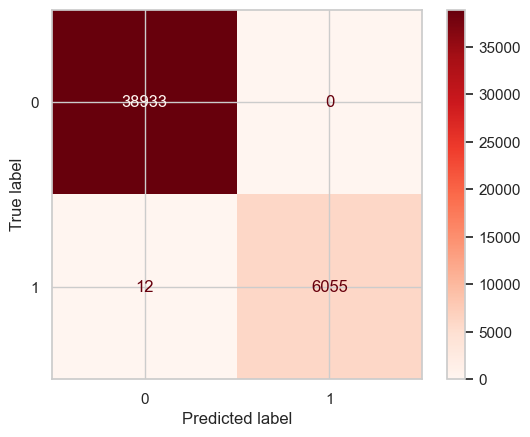

In [136]:
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grid, X_train, y_train, cmap='Reds'))

Insight :

- Model memiliki tingkat True Positives yang tinggi (6055), menunjukkan kemampuannya yang baik dalam mendeteksi transaksi fraud.
- Tingkat True Negatives juga tinggi (38933), menunjukkan kemampuan model dalam memprediksi transaksi non-fraud dengan akurat.
- Kesalahan model terdapat pada False Negatives (12), yang berarti ada 12 transaksi fraud yang tidak terdeteksi oleh model.
- Kesalahan False Positives (0) menunjukkan bahwa model tidak membuat prediksi fraud yang sebenarnya non-fraud.

Kelebihan model berdasarkan hasil pelatihan:
- Model menunjukkan tingkat True Positives yang sangat tinggi (6055), mencerminkan kemampuannya yang luar biasa dalam mengidentifikasi transaksi fraud. Tingkat keefektifan ini tercermin dalam kemampuan model dalam mengenali kasus positif.
- Tingkat True Negatives juga tinggi (38933), menunjukkan keakuratan model dalam memprediksi transaksi non-fraud. Model dapat secara efektif mengurangi kesalahan prediksi pada transaksi yang sebenarnya bukan fraud.
- Kesalahan False Positives sangat minim (0), menunjukkan bahwa model tidak membuat prediksi fraud untuk transaksi yang sebenarnya bukan fraud. Hal ini dapat dianggap sebagai aspek positif karena mengurangi potensi gangguan atau ketidaknyamanan yang mungkin timbul akibat kesalahan ini.

Kelemahan model berdasarkan hasil pelatihan:
- Meskipun jumlahnya relatif kecil, terdapat kesalahan False Negatives sebanyak 12, menandakan adanya transaksi fraud yang tidak terdeteksi oleh model. Kendati jumlahnya kecil, hal ini perlu menjadi perhatian serius karena berpotensi menimbulkan kerugian finansial dan reputasi.

## Scoring Test

In [137]:
y_test_pred = grid.predict(X_test)

# Menampilkan laporan klasifikasi untuk data uji
print("="*25,"TEST","="*25)
print(classification_report(y_test,y_test_pred))

========================= TEST =========================
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4337
           1       0.96      0.98      0.97       663

    accuracy                           0.99      5000
   macro avg       0.98      0.99      0.98      5000
weighted avg       0.99      0.99      0.99      5000



Model yang telah diuji pada data yang belum pernah dilihat sebelumnya menunjukkan performa yang sangat baik dengan akurasi sebesar 99%. Untuk kelas mayoritas (0), model mencapai tingkat presisi, recall, dan F1-score sebesar 1.00, menandakan kemampuannya dalam memprediksi dengan sangat baik. Sementara itu, untuk kelas minoritas (1), model memiliki tingkat presisi sebesar 0.96, recall sebesar 0.98, dan F1-score sebesar 0.97, yang menunjukkan kemampuan model dalam mendeteksi fraud dengan baik meskipun jumlah sampel yang lebih kecil. Meskipun terdapat sedikit penurunan recall untuk kelas 1 pada data uji dibandingkan dengan data latih, model tetap memberikan hasil yang sangat baik pada kasus yang belum pernah dilihat sebelumnya.

Confusion Matrix      : 


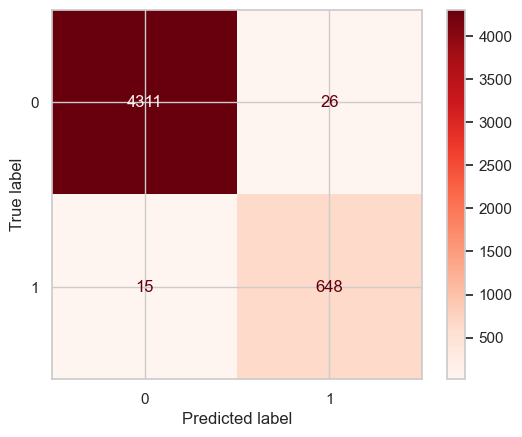

In [138]:
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, cmap='Reds'))

Insight :
- Model memiliki tingkat True Positives yang baik (648), menunjukkan kemampuannya dalam mendeteksi transaksi fraud pada data uji.
- Tingkat True Negatives juga tinggi (4311), menunjukkan kemampuan model dalam memprediksi transaksi non-fraud dengan akurat pada data uji.
- Terdapat sedikit kesalahan False Positives (26), yang berarti ada 26 prediksi fraud yang sebenarnya non-fraud pada data uji.
- Kesalahan False Negatives (15) menunjukkan bahwa model masih melewatkan beberapa transaksi fraud pada data uji.

Kelebihan Model berdasarkan hasil uji model:

- Tingkat True Positives yang Tinggi: Model memiliki kemampuan yang sangat baik dalam mendeteksi transaksi fraud, ditunjukkan oleh tingkat True Positives yang tinggi pada data latih dan uji.
- Tingkat True Negatives yang Tinggi:Tingkat True Negatives yang tinggi menunjukkan kemampuan model dalam memprediksi transaksi non-fraud dengan akurat, baik pada data latih maupun data uji.
- Tingkat False Positives yang Rendah:Kesalahan False Positives yang minim pada data latih dan uji menandakan bahwa model jarang membuat prediksi fraud untuk transaksi yang sebenarnya bukan fraud.
- Peningkatan Aspek Positif: Kesalahan False Positives yang rendah dapat mengurangi potensi gangguan atau ketidaknyamanan yang dapat terjadi akibat prediksi yang salah.

Kekurangan Model:

- Kesalahan False Negatives: Model masih memiliki kesalahan False Negatives, terutama pada data uji, yang menunjukkan bahwa ada transaksi fraud yang tidak terdeteksi. Hal ini dapat menyebabkan risiko kerugian finansial dan reputasi.

## Karakteristik

In [148]:
# Membuat variable baru
X_test_1 = X_test.copy()
X_test_1['Rot'] = y_test

# Menambahkan kolom baru
X_test_1['Prediction'] = y_test_pred

In [140]:
False_negatif = X_test_1[(X_test_1['Rot'] == 1 ) &(X_test_1['Prediction'] == 0)]
False_negatif

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,Rot,Prediction
11964,328684,1997,4629,600.42,2967139,34,1,0
35688,1750049,1497,8935,1.74,15772145,182,1,0
38645,1471140,3206,7113,467.36,13263504,153,1,0
31886,1049807,4168,8018,368.00,9460429,109,1,0
42829,413669,3175,4684,42.32,3734126,43,1,0
13890,547373,1795,1003,335.13,4931659,57,1,0
456,1002681,2785,4905,746.19,9031162,104,1,0
8321,238700,1801,6326,209.37,2138405,24,1,0
38780,696639,4225,1048,46.57,6270623,72,1,0
42883,1130754,3778,8018,960.01,10181017,117,1,0


Karakteristik False Negative :
- Jumlah transaksi (TX_AMOUNT) bervariasi, menunjukkan kesulitan model dalam mengklasifikasikan transaksi dengan nilai yang berbeda sebagai fraud.
- Waktu transaksi dalam hari dan detik bervariasi, tidak menunjukkan pola waktu khusus terkait dengan transaksi fraud yang salah terdeteksi.
- ID terminal dan pelanggan bervariasi, menunjukkan bahwa tidak ada terminal atau pelanggan tertentu yang secara khusus terkait dengan transaksi fraud yang salah terdeteksi.

Ringkasannya, transaksi False Negatif menunjukkan variasi yang signifikan dalam fitur-fitur tertentu, dan peningkatan fokus pada identifikasi pola fraud yang sulit mungkin diperlukan untuk memperbaiki model.

In [141]:
False_negatif.select_dtypes(exclude='object').mean()

TRANSACTION_ID     9.042446e+05
CUSTOMER_ID        2.856733e+03
TERMINAL_ID        6.155800e+03
TX_AMOUNT          3.938433e+02
TX_TIME_SECONDS    8.149257e+06
TX_TIME_DAYS       9.386667e+01
Rot                1.000000e+00
Prediction         0.000000e+00
dtype: float64

Ciri-ciri umum dari data deskriptif False Negatif melibatkan nilai rata-rata yang mungkin tidak menonjol dalam fitur-fitur tertentu.

In [142]:
# Hitung rata-rata dari kolom-kolom numerik pada dataframe True_negative
true_negatif = X_test_1[(X_test_1['Rot'] == 0 ) &(X_test_1['Prediction'] == 0)]
true_negatif.head()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,Rot,Prediction
11841,1640926,1430,9828,257.71,14801076,171,0,0
19602,726738,3520,841,407.04,6538491,75,0,0
45519,623777,1748,665,310.53,5625938,65,0,0
25747,156820,259,9076,112.94,1419259,16,0,0
42642,780042,1018,4056,575.55,7033178,81,0,0


Karakteristik True Negative :

Nilai-nilai fitur seperti TRANSACTION_ID, CUSTOMER_ID, TERMINAL_ID, TX_AMOUNT, TX_TIME_SECONDS, dan TX_TIME_DAYS pada True Negatif memiliki variasi yang bervariasi. 

In [143]:
true_negatif.select_dtypes(exclude='object').mean()

TRANSACTION_ID     8.726951e+05
CUSTOMER_ID        2.546244e+03
TERMINAL_ID        5.012101e+03
TX_AMOUNT          3.946254e+02
TX_TIME_SECONDS    7.863743e+06
TX_TIME_DAYS       9.051682e+01
Rot                0.000000e+00
Prediction         0.000000e+00
dtype: float64

Ciri-ciri dari True Negatif melibatkan rata-rata nilai yang bervariasi pada fitur-fitur tertentu. Rata-rata yang beragam ini menunjukkan variasi dalam nilai-nilai tersebut, tetapi tetap konsisten dalam kelas non-fraud, sesuai dengan prediksi model yang benar.

In [144]:
# Menghitung rata - rata
X_test1 = X_test_1.drop('Prediction',axis=1)
X_test1.groupby('Rot').mean()

,TRANSACTION_ID,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS
Rot,,,,,,
0,873635.027669,2544.525478,5013.636846,395.206329,7.872216e+06,90.614941
1,836754.057315,2525.901961,4999.125189,1443.135098,7.539618e+06,86.766214


Berdasarkan analisis rata-rata fitur-fitur pada transaksi dengan Rot = 0 (non-fraud) dan Rot = 1 (potensial false negative), ditemukan bahwa transaksi non-fraud yang berhasil diidentifikasi memiliki rata-rata nilai TRANSACTION_ID sekitar 873,635, CUSTOMER_ID sekitar 2,544.53, TERMINAL_ID sekitar 5,013.64, TX_AMOUNT sekitar 395.21, TX_TIME_SECONDS sekitar 7,872,216, dan TX_TIME_DAYS sekitar 90.61. 

Sementara itu, transaksi yang mungkin sulit diidentifikasi sebagai fraud (Rot = 1) memiliki rata-rata nilai yang sedikit lebih rendah, menunjukkan perbedaan karakteristik yang dapat diperhatikan untuk meningkatkan kemampuan model dalam mendeteksi kasus-kasus tersebut.

# Model Saving

In [149]:
# Menyimpan model terbaik menggunakan joblib
joblib.dump(grid, "my_model.pkl")

['my_model.pkl']

# Kesimpulan

## Kesimpulan berdasarkan pemilihan model :

Diantara model yang digunakan seperti SVM, KNN, Decision Tree, Random Forest, dan Boosting, Model Decision Tree mendemonstrasikan recall yang tinggi berdasarkan beberapa keunggulan tertentu:

- Memahami Pola Data:
Decision Tree secara alami mampu memahami dan mengekstraksi pola serta hubungan dalam data dengan efektif.

- Interpretabilitas yang Tinggi:
Struktur pohon keputusan memungkinkan interpretasi yang mudah oleh manusia, memudahkan pemahaman faktor-faktor yang berkontribusi pada prediksi fraud.

- Kemampuan Menangani Fitur Kategorikal:
Model ini dapat menangani baik fitur numerik maupun kategorikal tanpa transformasi tambahan, menjadi bermanfaat pada dataset dengan campuran jenis fitur.

- Menangani Pemisahan yang Non-linear:
Decision Tree dapat menangani pemisahan kelas yang non-linear, cocok untuk hubungan fitur dan label yang bersifat kompleks.

- Pengaturan Hyperparameter yang Mudah:
Melalui hyperparameter tuning, kinerja Decision Tree dapat dioptimalkan dengan penyesuaian kriteria split, kedalaman maksimum, dan jumlah sampel minimum.

- Kemampuan Menangani Imbalanced Data:
Model ini menunjukkan kinerja baik pada dataset yang tidak seimbang, seperti pada kasus deteksi fraud.

- Tingkat Kerumitan yang Sesuai:
Decision Tree memiliki tingkat kerumitan yang dapat disesuaikan, memungkinkan penyesuaian untuk mencapai keseimbangan antara underfitting dan overfitting.

Walaupun Decision Tree memiliki keunggulan ini, perlu diingat bahwa hasil tergantung pada karakteristik khusus dari dataset, dan dalam beberapa kasus, model lain mungkin lebih optimal.

## Kesimpulan terhadap hasil model yang dipilih :

>*1. Performa Umum Model:*

- Model ini memiliki hasil yang umumnya baik untuk kelas minoritas (1), model memiliki tingkat presisi sebesar 0.96, recall sebesar 0.98, dan F1-score sebesar 0.97 pada data uji.
- Tingkat True Positives dan True Negatives yang tinggi menunjukkan kemampuan model dalam mengidentifikasi transaksi fraud dan non-fraud dengan baik.

>*2. Kesalahan Model:*

- Terdapat beberapa kasus False Negatives yang menunjukkan bahwa model masih melewatkan beberapa transaksi fraud. Ini dapat menjadi area perbaikan untuk meningkatkan recall pada kelas fraud.

>*3. Karakteristik False Negatives:*

- Transaksi ini menunjukkan variasi nilai fitur, pola waktu yang tidak konsisten, dan kesalahan dalam mendeteksi fraud, menekankan perlunya peningkatan pada model untuk fokus pada pola khusus dan mengurangi jumlah kasus yang terlewat.

>*4. Karakteristik True Negatives:*

- Transaksi yang berhasil diidentifikasi sebagai non-fraud (True Negatives) memiliki variasi nilai fitur yang wajar dan model berhasil memprediksinya dengan benar.

>*5. Perbaikan Model:*

- Model dapat diperbaiki dengan meningkatkan analisis terhadap kasus-kasus False Negatives, mungkin dengan menambahkan fitur atau menyesuaikan parameter model.
- Fokus pada peningkatan recall untuk kelas fraud dapat membantu mengurangi jumlah False Negatives.

>*6. Penggunaan Model:*

- Model ini dapat digunakan untuk deteksi fraud pada transaksi keuangan dengan tingkat akurasi yang tinggi. 
- Model dapat memberikan nilai tambah dalam memitigasi risiko fraud dan melindungi keuangan perusahaan.

>*7. Pemantauan dan Peningkatan Lanjutan:*

- Model perlu dipantau secara berkala, dan perbaikan atau penyesuaian lanjutan diperlukan untuk menjaga kinerja model seiring waktu.
- Model ini dapat digunakan sebagai alat bantu dalam pengambilan keputusan terkait dengan deteksi fraud, namun perlu pemahaman kontekstual dan pemantauan yang berkelanjutan.

## Kesimpulan terhadap problem statement :

Dari pernyataan masalah, dapat disimpulkan bahwa model yang berhasil dikembangkan telah mencapai tingkat akurasi yang tinggi dalam mengenali transaksi fraud. Meskipun demikian, menghadapi ketidakseimbangan data menjadi tantangan, sehingga diperlukan fokus khusus untuk mengurangi kesalahan prediksi terhadap transaksi fraud. Penilaian model tidak hanya mengandalkan akurasi umum, tetapi juga mempertimbangkan metrik evaluasi yang lebih cerdas. Secara keseluruhan, model ini memberikan solusi yang cerdas dan efisien untuk meningkatkan keamanan sistem pembayaran dengan prediksi optimal terkait transaksi fraud. Meski demikian, masih terdapat peluang untuk perbaikan, terutama dalam mengatasi kasus False Negatives

# Conceptual Problems

## 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Bagging atau Bootstrap Aggregating, adalah teknik ensemble learning yang dirancang untuk meningkatkan kinerja model prediktif dengan menggabungkan hasil dari beberapa model yang diperoleh dari subset acak data pelatihan. Ide dasarnya adalah untuk mengurangi varians model dan meningkatkan kestabilan serta ketepatan prediksi.

Latar belakangnya berkaitan dengan konsep resampling, terutama metode bootstrap. Bootstrap melibatkan pengambilan sampel dengan pengembalian dari dataset pelatihan, yang menghasilkan dataset yang berbeda pada setiap iterasinya. Dengan kata lain, beberapa data dapat muncul lebih dari sekali, sementara yang lain mungkin tidak muncul sama sekali.

Bagging efektif karena mengurangi varians. Dengan menggunakan variasi dalam subset pelatihan, bagging membantu menghindari overfitting pada data pelatihan tertentu dan meningkatkan kinerja model secara keseluruhan.

Cara kerja bagging secara umum sebagai berikut:
- Pembuatan Subset: Bagging memulai dengan membuat beberapa subset acak dari dataset pelatihan menggunakan metode bootstrap. Setiap subset memiliki ukuran yang sama dengan dataset pelatihan asli.
- Pembuatan Model: Model prediktif (biasanya model yang sama) dilatih pada setiap subset. Karena setiap subset berbeda, model-model ini akan sedikit berbeda satu sama lain.
- Prediksi Individual: Setelah pelatihan selesai, setiap model memberikan prediksi pada dataset uji atau data baru.
- Aggregasi Hasil: Hasil prediksi dari setiap model digabungkan atau diagregasi. Dalam konteks klasifikasi, ini dapat dilakukan dengan mengambil mayoritas suara (bagging untuk pohon keputusan) atau dengan memberikan bobot pada setiap prediksi dan mengambil rata-rata bobotnya (bagging untuk model regresi).
- Output Ensemble: Hasil agregasi inilah yang diambil sebagai output akhir dari model ensemble.

## 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

>1. Jenis Model:
- Random Forest (RF): RF adalah ensemble dari pohon keputusan. Setiap pohon dibangun secara independen dan hasil prediksi diambil dengan mengagregasi hasil prediksi semua pohon.
- XGBoost: XGBoost juga menggunakan pohon keputusan, tetapi pendekatannya adalah secara bertahap (boosting). Model dibangun secara berurutan, dan setiap pohon berusaha memperbaiki kesalahan prediksi model sebelumnya.

>2. Pembuatan Model:
- Random Forest (RF): Setiap pohon dibangun secara independen dari yang lain. Subset acak dari fitur dan data bootstrap digunakan untuk melatih setiap pohon.
- XGBoost: Pohon-pohon dibangun secara berurutan. Pohon baru menargetkan kesalahan yang tidak diatasi oleh pohon sebelumnya. Bobot diberikan pada setiap sampel untuk menekankan pada sampel yang diabaikan atau sulit diprediksi sebelumnya.

>3. Pengelolaan Kesalahan:
- Random Forest (RF): Kesalahan prediksi dari setiap pohon diimbangi dengan penggabungan hasil dari banyak pohon, yang dapat mengurangi overfitting.
- XGBoost: Model berfokus pada mengurangi kesalahan prediksi secara bertahap. Setiap pohon berusaha memperbaiki kesalahan model sebelumnya, sehingga lebih efektif dalam mengatasi kesalahan prediksi.

>4. Regularisasi:
- Random Forest (RF): RF cenderung memiliki batasan alami terhadap overfitting karena setiap pohon dibangun secara independen dengan pembatasan pada jumlah fitur yang dipertimbangkan pada setiap split.
- XGBoost: Menyediakan mekanisme regularisasi yang lebih kuat, seperti termasuk komponen regularisasi dalam fungsi tujuan yang dioptimalkan selama proses pelatihan.

>5. Kecepatan dan Skalabilitas:
- Random Forest (RF): RF dapat bekerja secara paralel dengan baik karena setiap pohon dibangun secara independen.
- XGBoost: XGBoost juga dapat dijalankan secara paralel, dan implementasinya dioptimalkan untuk efisiensi komputasi.

>6. Penanganan Data Tidak Seimbang:
- Random Forest (RF): RF dapat menangani data tidak seimbang melalui pembobotan kelas atau teknik lainnya.
- XGBoost: XGBoost memiliki mekanisme khusus untuk menangani data tidak seimbang, seperti memberikan bobot pada kelas atau menggunakan fungsi tujuan yang disesuaikan.

## 3. Jelaskan apa yang dimaksud dengan Cross Validation !

Cross Validation (CV) adalah suatu metode evaluasi kinerja model machine learning dengan cara membagi dataset menjadi subset yang saling tumpang tindih untuk melatih dan menguji model. Tujuannya adalah untuk mendapatkan estimasi yang lebih baik tentang seberapa baik model akan berkinerja pada data yang tidak terlihat.

Proses Cross Validation melibatkan langkah-langkah berikut:
- Pembagian Data: Dataset dibagi menjadi k subset atau lipatan (folds). Misalnya, jika kita memilih k = 5, dataset akan dibagi menjadi 5 subset seukuran yang hampir sama.
- Iterasi Training dan Testing: Model dilatih k kali menggunakan k-1 subset sebagai data pelatihan dan diuji pada subset yang tersisa. Proses ini diulangi k kali, di mana setiap subset digunakan sebagai set pengujian tepat satu kali.
- Pengukuran Kinerja: Kinerja model diukur dan dicatat pada setiap iterasi. Metrik evaluasi seperti akurasi, presisi, recall, atau F1-score digunakan untuk menilai seberapa baik model berkinerja pada setiap iterasi.
- Perhitungan Rata-rata dan Deviasi Standar: Setelah semua iterasi selesai, metrik kinerja dihitung secara rata-rata dan deviasi standarnya. Ini memberikan gambaran yang lebih stabil tentang kinerja model daripada hanya menggunakan satu pemisahan data pelatihan dan pengujian.

Keuntungan dari Cross Validation termasuk:
- Mengurangi Variabilitas: Dengan menggunakan beberapa pemisahan data, kita dapat mengurangi variabilitas hasil evaluasi model.
- Menggunakan Data Secara Efisien: Model dapat memanfaatkan semua data untuk pelatihan dan pengujian, sehingga memberikan estimasi kinerja yang lebih andal.

Beberapa jenis Cross Validation yang umum digunakan meliputi K-Fold Cross Validation, Stratified K-Fold Cross Validation, Leave-One-Out Cross Validation (LOOCV), dan sebagainya. Pemilihan metode tergantung pada karakteristik dataset dan masalah yang dihadapi.